# EDA

Initial exploration of the data

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [ ]:
sns.set_palette("coolwarm")
sns.set_theme()
sns.set(rc={"figure.figsize": (10, 5)})
pd.options.display.float_format = "{:,.4f}".format

In [ ]:
# Loading the datasets
train_sample_df = pd.read_csv("./fraud-detection-clicks/train_sample.csv")
train_df = pd.read_csv("./fraud-detection-clicks/train.csv")
test_df = pd.read_csv("./fraud-detection-clicks/test.csv")

##### Train - Initial Exploration

In [ ]:
# Check the original data fields
train_df.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

**Quick brief on columns in data**

Current features are:
* ip
* app
* device
* os
* channel
* click_time

Other fields:
* click_id (id of each sample)
* attributed_time (prediction point time)
* is_attributed (predicted value)

In [5]:
# Looking on a sample of the data
train_df.head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,83230,3,1,13,379,2017-11-06 14:32:21,NaN,0
1,17357,3,1,19,379,2017-11-06 14:33:34,NaN,0
2,35810,3,1,13,379,2017-11-06 14:34:12,NaN,0
3,45745,14,1,13,478,2017-11-06 14:34:52,NaN,0
4,161007,3,1,13,379,2017-11-06 14:35:08,NaN,0
5,18787,3,1,16,379,2017-11-06 14:36:26,NaN,0
6,103022,3,1,23,379,2017-11-06 14:37:44,NaN,0
7,114221,3,1,19,379,2017-11-06 14:37:59,NaN,0
8,165970,3,1,13,379,2017-11-06 14:38:10,NaN,0
9,74544,64,1,22,459,2017-11-06 14:38:23,NaN,0


In [6]:
train_df[~train_df.attributed_time.isnull()].head(10)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
103,204158,35,1,13,21,2017-11-06 15:41:07,2017-11-07 08:17:19,1
1504,29692,9,1,22,215,2017-11-06 16:00:02,2017-11-07 10:05:22,1
1798,64516,35,1,13,21,2017-11-06 16:00:02,2017-11-06 23:40:50,1
2102,172429,35,1,46,274,2017-11-06 16:00:03,2017-11-07 00:55:29,1
3056,199085,35,1,13,274,2017-11-06 16:00:04,2017-11-06 23:04:54,1
3220,82917,19,0,24,210,2017-11-06 16:00:04,2017-11-07 00:21:50,1
3939,126647,72,1,6,101,2017-11-06 16:00:05,2017-11-06 16:01:18,1
5282,57546,29,1,41,213,2017-11-06 16:00:07,2017-11-06 16:03:51,1
5377,189682,35,1,13,21,2017-11-06 16:00:07,2017-11-06 23:37:17,1
5438,24200,19,88,24,213,2017-11-06 16:00:07,2017-11-07 04:18:51,1


##### Check for nulls in the data

In [7]:
# Check for dtypes + nulls in the dataframe
train_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26877324 entries, 0 to 26877323
Data columns (total 8 columns):
 #   Column           Non-Null Count     Dtype 
---  ------           --------------     ----- 
 0   ip               26877324 non-null  int64 
 1   app              26877324 non-null  int64 
 2   device           26877324 non-null  int64 
 3   os               26877324 non-null  int64 
 4   channel          26877324 non-null  int64 
 5   click_time       26877324 non-null  object
 6   attributed_time  64876 non-null     object
 7   is_attributed    26877324 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ GB


##### Test - Initial Exploration

In [ ]:
# Check the original data fields
test_df.columns

Index(['click_id', 'ip', 'app', 'device', 'os', 'channel', 'click_time'], dtype='object')

In [9]:
# Looking on a sample of the data
test_df.head(10)

,click_id,ip,app,device,os,channel,click_time
0,2010044773365,14058,14,1,12,489,2017-11-09 15:00:00
1,2010044773366,78992,9,1,22,107,2017-11-09 15:00:00
2,2010044773367,14633,2,1,27,477,2017-11-09 15:00:00
3,2010044773368,72951,1,1,23,377,2017-11-09 15:00:00
4,2010044773369,209359,2,1,19,219,2017-11-09 15:00:00
5,2010044773370,149061,2,1,19,236,2017-11-09 15:00:00
6,2010044773371,91661,3,1,13,417,2017-11-09 15:00:00
7,2010044773372,149061,9,1,19,127,2017-11-09 15:00:00
8,2010044773373,48212,7,1,11,101,2017-11-09 15:00:00
9,2010044773374,91661,3,1,13,115,2017-11-09 15:00:00


In [10]:
# Checking dtypes + null types
test_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026558 entries, 0 to 3026557
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   click_id    3026558 non-null  int64 
 1   ip          3026558 non-null  int64 
 2   app         3026558 non-null  int64 
 3   device      3026558 non-null  int64 
 4   os          3026558 non-null  int64 
 5   channel     3026558 non-null  int64 
 6   click_time  3026558 non-null  object
dtypes: int64(6), object(1)
memory usage: 161.6+ MB


Doesn't seem like we have a problem.
The only nulls exist in the arrtibuted_time column (which is expected for all the is_arrtibuted=0 samples)

### Checking Imbalance Levels

In [11]:
train_df.is_attributed.value_counts()

0    26812448
1       64876
Name: is_attributed, dtype: int64

In [ ]:
def get_dataset_base_stats(df, ds_name):
    print(f"### {ds_name} base stats ###")
    if "is_attributed" in df.columns.tolist():
        pos_count = df[df.is_attributed == 1].shape[0]
        neg_count = df[df.is_attributed == 0].shape[0]

        print(f"{ds_name} dataset positives: {pos_count}")
        print(f"{ds_name} dataset negatives: {neg_count}")
        y_train_norm = df["is_attributed"].value_counts(normalize=True) * 100
        ax = sns.barplot(x=y_train_norm.index, y=y_train_norm)
        ax.bar_label(ax.containers[0], fmt="%.2f%%")
        plt.show()


### train base stats ###
train dataset positives: 64876
train dataset negatives: 26812448


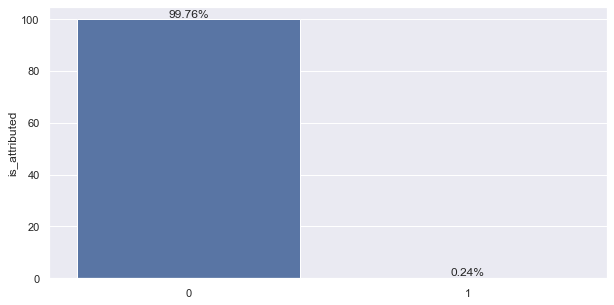

In [ ]:
# Train set stats
get_dataset_base_stats(train_df, "train")

As we see, the dataset is highly imbalance (0.24%~ of true samples out of the entire data).

We will have to reflect this in the KPIs we try to optimize, and possibly in the true label sample's weights.

# Base features analysis

### High level stats

##### Train

In [14]:
train_df.describe()

,ip,app,device,os,channel,is_attributed
count,"26,877,324.0000","26,877,324.0000","26,877,324.0000","26,877,324.0000","26,877,324.0000","26,877,324.0000"
mean,"89,093.7677",12.4090,29.2207,24.0528,259.9114,0.0024
std,"63,738.6835",15.4817,296.0393,61.1285,131.2449,0.0491
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,"41,274.0000",3.0000,1.0000,13.0000,135.0000,0.0000
50%,"80,560.0000",12.0000,1.0000,18.0000,245.0000,0.0000
75%,"119,362.0000",15.0000,1.0000,19.0000,379.0000,0.0000
max,"364,778.0000",764.0000,"4,221.0000",954.0000,500.0000,1.0000


##### Test

In [15]:
test_df.describe()

,click_id,ip,app,device,os,channel
count,"3,026,558.0000","3,026,558.0000","3,026,558.0000","3,026,558.0000","3,026,558.0000","3,026,558.0000"
mean,"2,139,730,255,092.7351","95,459.7646",11.9112,13.2877,21.6846,255.3462
std,"77,337,596,534.9247","82,040.9334",12.4426,214.1721,51.1452,137.6675
min,"2,010,044,773,365.0000",1.0000,0.0000,0.0000,0.0000,0.0000
25%,"2,078,764,182,512.2500","41,028.0000",3.0000,1.0000,13.0000,128.0000
50%,"2,138,893,760,006.5000","78,918.0000",11.0000,1.0000,18.0000,232.0000
75%,"2,199,023,337,384.7500","114,507.0000",15.0000,1.0000,19.0000,379.0000
max,"2,542,620,653,139.0000","364,776.0000",685.0000,"4,207.0000",949.0000,498.0000


### Correlation between the features and features to label

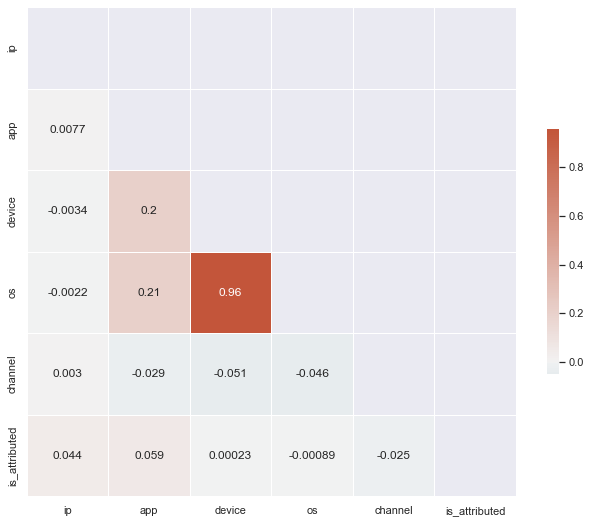

In [ ]:
features_correlation = train_df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(features_correlation, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    features_correlation,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True,
);

We see that there is:
1. High correlation between the OS and device (which is expected), we might want to drop one of them prior to training.
2. Decent correlation between the device and os compared to the app (which is expected).
3. Some correlation for the label and IP / app -> This means that they might be features with higher importance.

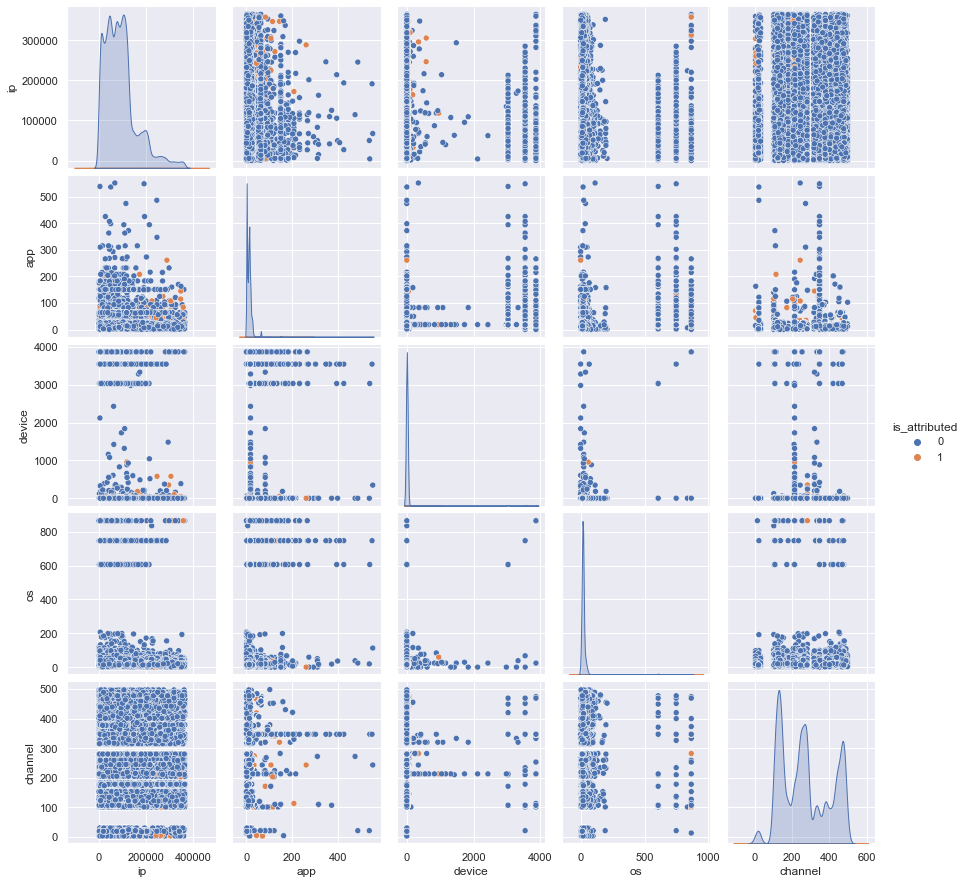

In [17]:
sns.pairplot(train_sample_df, hue="is_attributed")

##### Features uniqueness

In [18]:
train_df.nunique()

ip                 120090
app                   459
device               1551
os                    398
channel               185
click_time          47858
attributed_time     38492
is_attributed           2
dtype: int64

In [ ]:
train_df[train_df.is_attributed == 1].nunique()

ip                 46402
app                  172
device               774
os                    85
channel              159
click_time         29159
attributed_time    38492
is_attributed          1
dtype: int64

In [ ]:
train_df[train_df.is_attributed == 1].nunique() / train_df.nunique()

ip                0.3864
app               0.3747
device            0.4990
os                0.2136
channel           0.8595
click_time        0.6093
attributed_time   1.0000
is_attributed     0.5000
dtype: float64

We can see some interesting information per feature here.
1. We only see installs in 21% of the operating systems - We can try to understand in the future if there might be a lot of OS used by bots.
2. We see that almost all the channels get installations so even though different channels have different traffic quality, most of them get installations anyways.
3. Only 40%-50% of the device types / IPs / Apps get installations, there might be a lot of devices that are used by bots (we might want to consult with an expert on this - they probably use older devices?)

*Check datasets time ranges and histogram*

In [ ]:
train_df.click_time.agg({"min", "max"})

min    2017-11-06 14:32:21
max    2017-11-09 14:59:59
Name: click_time, dtype: object

### Features distribution - is_attributed vs. not is_attributed

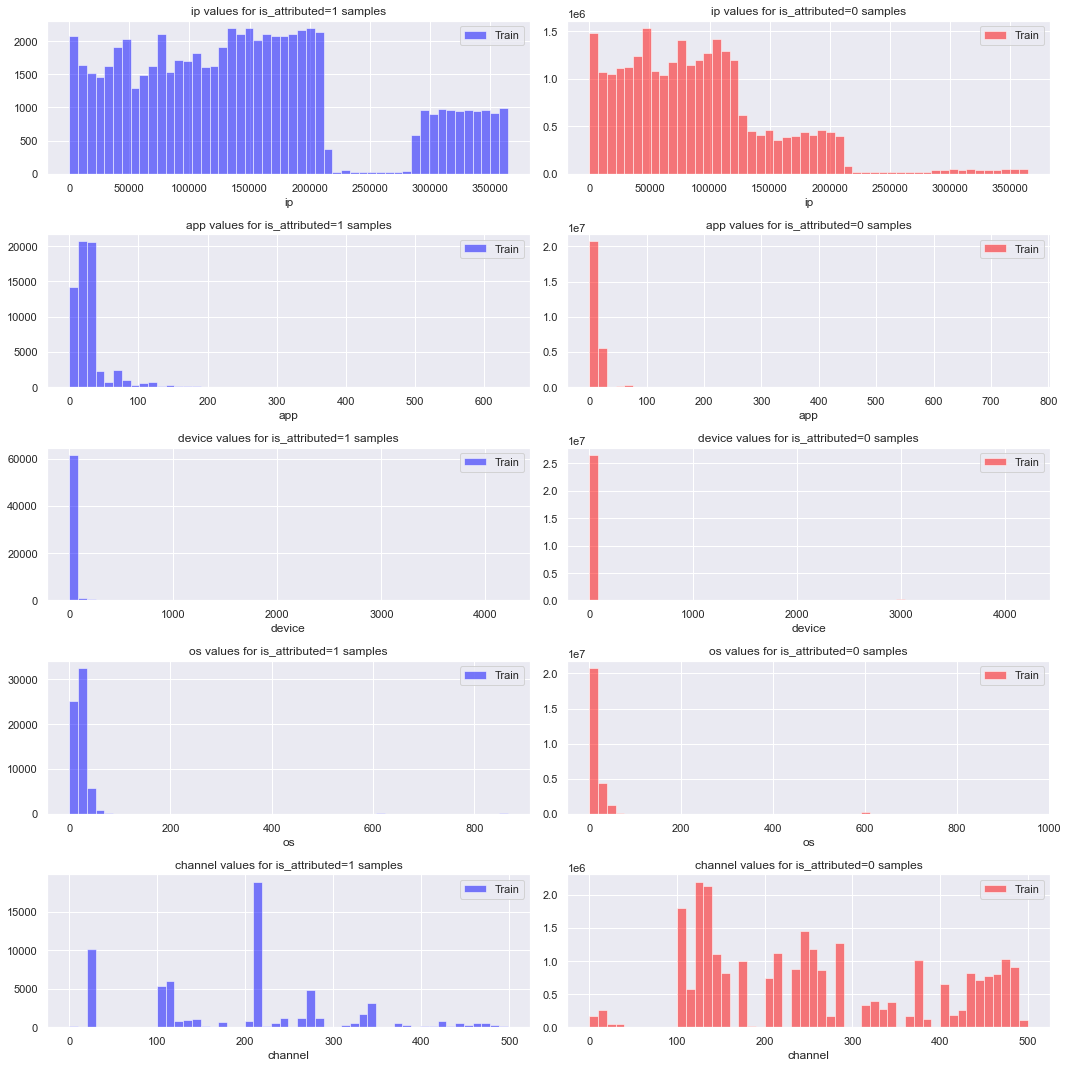

In [ ]:
plt.figure(figsize=(15, 15))

train_features = [
    col
    for col in train_df.columns.tolist()
    if col not in ["is_attributed", "attributed_time", "click_time"]
]
num_of_features = len(train_features)
i = 1

for feature in train_features:
    plt.subplot(num_of_features, 2, i)
    train_df[train_df.is_attributed == 1][feature].hist(
        alpha=0.5, color="blue", bins=50, label="Train"
    )
    plt.legend()
    plt.title(f"{feature} values for is_attributed=1 samples")
    plt.xlabel(feature)

    plt.subplot(num_of_features, 2, i + 1)
    train_df[train_df.is_attributed == 0][feature].hist(
        alpha=0.5, color="red", bins=50, label="Train"
    )
    plt.title(f"{feature} values for is_attributed=0 samples")
    plt.legend()
    plt.xlabel(feature)
    i += 2
plt.tight_layout()

We can see that per feature, for some of the features like channel / app / IP, the positive samples tend to distribute differenetly compared to the negative samples, we can take that into consideration in our FE step, looking for the common phenomenas that we see only in the attributes samples / unattributed samples.

### Features distribution - Train vs. Test

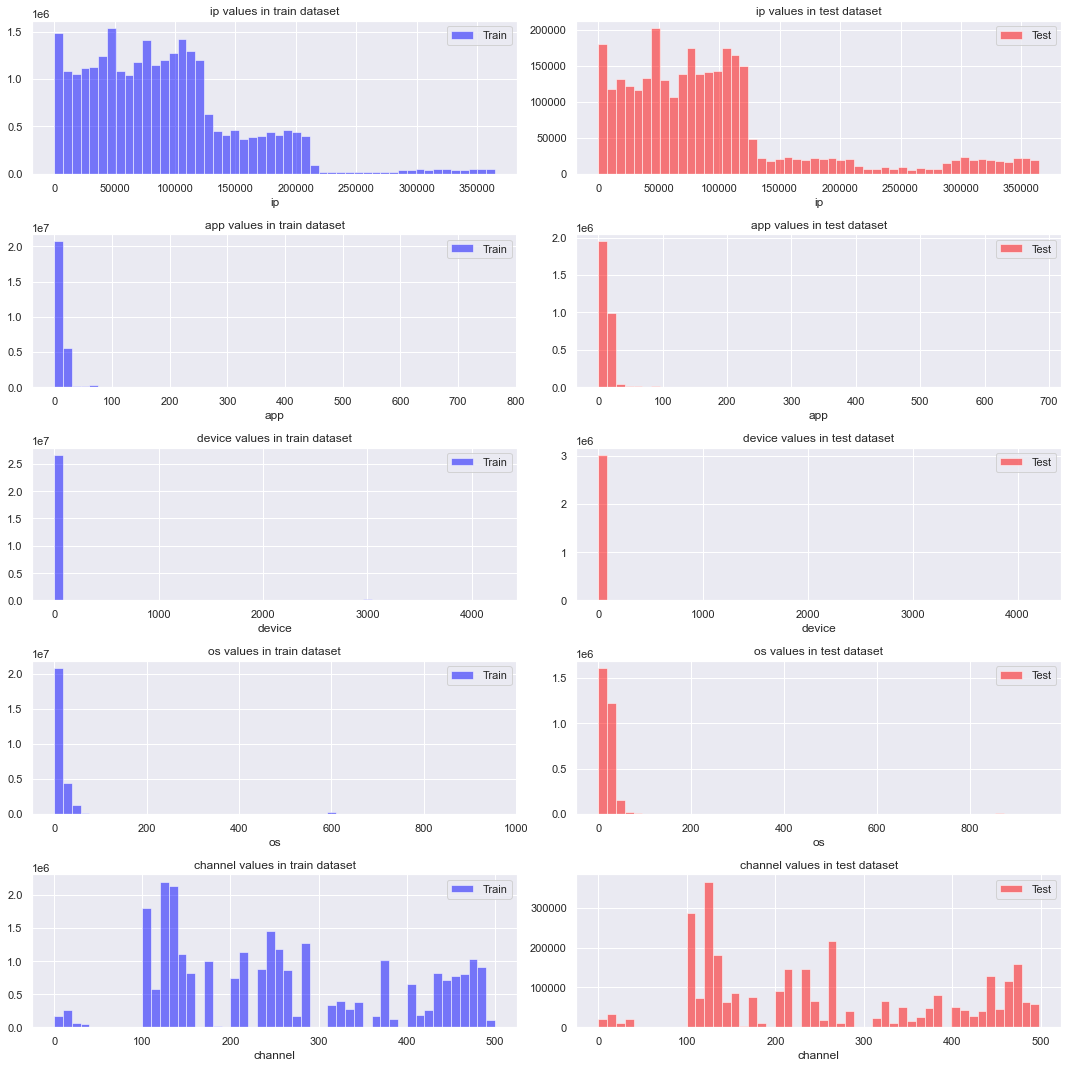

In [ ]:
plt.figure(figsize=(15, 15))

train_features = [
    col
    for col in train_df.columns.tolist()
    if col not in ["is_attributed", "attributed_time", "click_time"]
]
num_of_features = len(train_features)
i = 1

for feature in train_features:
    plt.subplot(num_of_features, 2, i)
    train_df[feature].hist(alpha=0.5, color="blue", bins=50, label="Train")
    plt.legend()
    plt.title(f"{feature} values in train dataset")
    plt.xlabel(feature)

    plt.subplot(num_of_features, 2, i + 1)
    test_df[feature].hist(alpha=0.5, color="red", bins=50, label="Test")
    plt.title(f"{feature} values in test dataset")
    plt.legend()
    plt.xlabel(feature)
    i += 2
plt.tight_layout()

We can see that a lot of the IPs / channels are not represented in the same way we see in train, this might have an impact on our model and the test performance.

We might need to use augmentation / adjust weights to the train samples so we learn the same phenomenas we expect in the test.

### Time Analysis

##### Click time analysis

In [ ]:
train_df["click_time_dt"] = pd.to_datetime(train_df["click_time"])
train_df["click_time_hour"] = train_df.click_time_dt.dt.round("H")

click_time_hour
2017-11-06 15:00:00         83
2017-11-06 16:00:00    1312093
2017-11-06 17:00:00    1728210
2017-11-06 18:00:00     943727
2017-11-06 19:00:00     599021
2017-11-06 20:00:00     430978
2017-11-06 21:00:00     432155
2017-11-06 22:00:00     753622
2017-11-06 23:00:00    1781348
2017-11-07 00:00:00    3118725
2017-11-07 01:00:00    3502937
2017-11-07 02:00:00    2897094
2017-11-07 03:00:00     904065
2017-11-07 04:00:00    1595934
2017-11-09 13:00:00    1685302
2017-11-09 14:00:00    3528345
2017-11-09 15:00:00    1663685
Name: is_attributed, dtype: int64


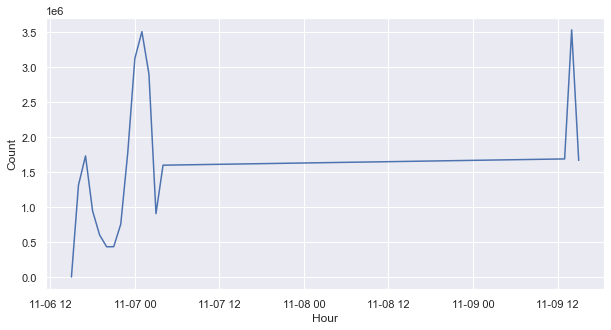

In [ ]:
train_for_time_series = train_df.groupby("click_time_hour")[
    "is_attributed"
].count()  # .rename('count')
print(train_for_time_series)
sns.lineplot(
    x=train_for_time_series.index,
    y=train_for_time_series.values,
    data=train_for_time_series,
).set(xlabel="Hour", ylabel="Count")
plt.show()

Seems like we have a gap of data between 2017-11-07 5AM to 2017-11-09 12PM

In [ ]:
train_sample_df["click_time_dt"] = pd.to_datetime(train_sample_df["click_time"])
train_sample_df["click_time_hour"] = train_sample_df.click_time_dt.dt.round("H")

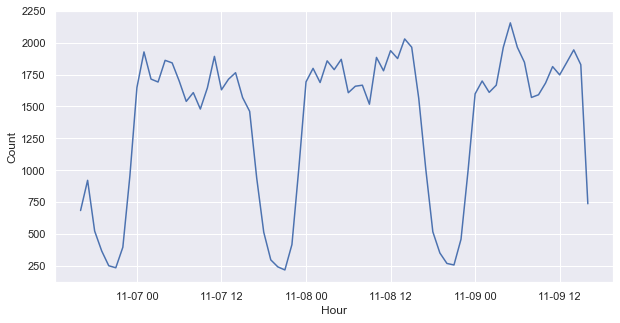

In [ ]:
train_sample_for_time_series = (
    train_sample_df.groupby("click_time_hour")["is_attributed"].count().rename("count")
)
sns.lineplot(
    x=train_sample_for_time_series.index,
    y=train_sample_for_time_series.values,
    data=train_sample_for_time_series,
).set(xlabel="Hour", ylabel="Count")
plt.show()

Somehow this is not happening in the sampled CSV?

In [28]:
test_df.click_time.min(), test_df.click_time.max()

('2017-11-09 15:00:00', '2017-11-09 16:00:00')

Seems like we only have one hour in test, we might want to consider giving samples in the train with the same hour ranges a higher weight.

Let's look at the histogram of samples during that hour:

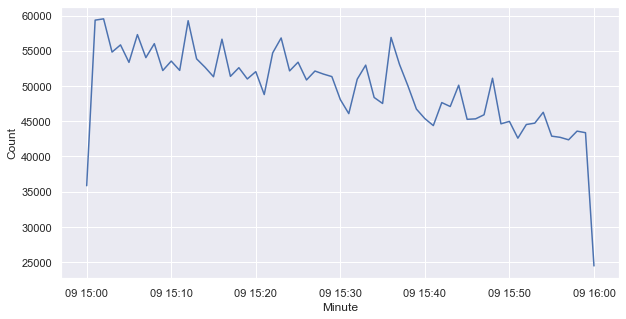

In [ ]:
test_df["click_time"] = pd.to_datetime(test_df["click_time"])
test_df["click_time_min"] = test_df.click_time.dt.round("T")
test_for_time_series = (
    test_df.groupby("click_time_min")["click_id"].count().rename("count")
)
sns.lineplot(
    x=test_for_time_series.index,
    y=test_for_time_series.values,
    data=test_for_time_series,
).set(xlabel="Minute", ylabel="Count")
plt.show()

##### Attributed time analysis

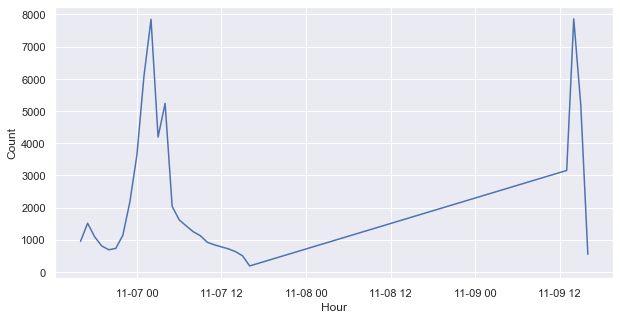

In [ ]:
##### Attributed time analysis
train_df_is_attributed = train_df[train_df.is_attributed == 1].copy()
train_df_is_attributed["attributed_time_dt"] = pd.to_datetime(
    train_df_is_attributed.attributed_time
)
train_df_is_attributed["attributed_hour"] = (
    train_df_is_attributed.attributed_time_dt.dt.round("H")
)

train_for_time_series = train_df_is_attributed.groupby("attributed_hour")[
    "is_attributed"
].count()
sns.lineplot(
    x=train_for_time_series.index,
    y=train_for_time_series.values,
    data=train_for_time_series,
).set(xlabel="Hour", ylabel="Count")
plt.show()

<AxesSubplot:xlabel='click_to_attribute_delta_mins', ylabel='is_attributed'>

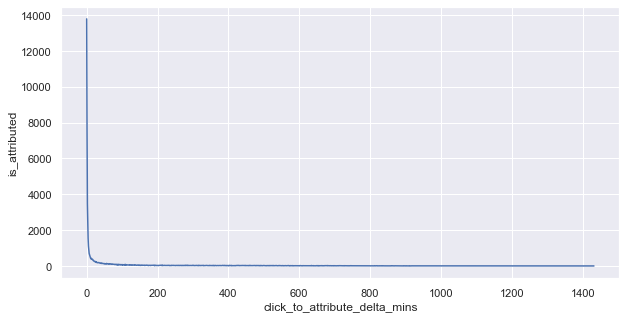

In [ ]:
train_df_is_attributed["click_to_attribute_delta"] = (
    train_df_is_attributed.attributed_time_dt - train_df_is_attributed.click_time_dt
)
train_df_is_attributed["click_to_attribute_delta_mins"] = (
    train_df_is_attributed.click_to_attribute_delta.dt.total_seconds()
    .div(60)
    .astype(np.int64)
)
counts = (
    train_df_is_attributed.groupby("click_to_attribute_delta_mins")["is_attributed"]
    .count()
    .reset_index()
)
sns.lineplot(x=counts["click_to_attribute_delta_mins"], y=counts["is_attributed"])


In [ ]:
train_df_is_attributed.click_to_attribute_delta_mins.value_counts(normalize=True).head(
    10
)

0   0.2125
1   0.1172
2   0.0536
3   0.0367
4   0.0238
5   0.0171
6   0.0136
7   0.0107
8   0.0097
9   0.0090
Name: click_to_attribute_delta_mins, dtype: float64

We can see that at least 40% of the attributed samples are done within 5 minutes from the click time

# Conclusions Summary

Summarizing some of the key points we've seen as part of this EDA:

#### Datasets & Classes
1. We see that we don't have any nulls except the attribution_time (which is expected for clicks without an insatallation).
2. The dataset is highly imbalance (only 0.24% of the samples has been attributed) - We will have to reflect this in the KPIs we try to optimize, in addition, depends on the problem goal, we might want to consider modifying the attributed sample's weights.

#### Base Features (raw data features)
**Correlation**

1. High correlation between the OS and device (which is expected), we might want to drop one of them prior to training.
2. Decent correlation between the device and os compared to the app (which is expected).
3. Some correlation for the label and IP / app -> This means that they might be features with higher importance.

**Unique Values**

1. We only see installs in 21% of the operating systems - We can try to understand in the future if there might be a lot of OS used by bots.
2. We see that almost all the channels get installations so even though different channels have different traffic quality, most of them get installations anyways.
3. Only 40%-50% of the device types / IPs / Apps get installations, there might be a lot of devices that are used by bots (we might want to consult with an expert on this - they probably use older devices?)

**Attributed samples feature behaviour vs. unattributed samples**

We can see that per feature, for some of the features like channel / app / IP, the positive samples tend to distribute differenetly compared to the negative samples, we can take that into consideration in our FE step, looking for the common phenomenas that we see only in the attributes samples / unattributed samples.

**Train vs. Test analysis**

We can see that a lot of the IPs / channels are not represented in the same way we see in train, this might have an impact on our model and the test performance.
We might need to use augmentation / adjust weights to the train samples so we learn the same phenomenas we expect in the test.



#### Time series
1. We have a gap of data in the train samples between 2017-11-07 5AM to 2017-11-09 12PM (although in the train_sample.csv we don't have this gap - if this was a production project it would probably mean that the collection of train data was bad and we need to re-collect it).
2. We can see that at least 45%~ of the attributed samples are done within 5 minutes from the click time, if we are to use this mechanism in production to decide how to label the click and get our money back from the advertised channel based on detecteed bots, we can use this information as one of the features.
3. We only have a single hour in the test set, and we also see in the train sample, when we look by hour we see a repetitive pattern based on day and night hours, this means we might want to give the samples in the train with the same hour ranges as the test set a bigger weight / using the hour as feature.